In [ ]:
# Solves a collection of deceptive functions by using a simple genetic algorithm with binary representation. 

import random
import numpy
import math
import matplotlib.pyplot
import pandas as pd



In [ ]:
url = "https://raw.githubusercontent.com/EiderDiaz/Evolutionary_Computation_Assignments/master/neurovolutoin/data.csv?token=AEH26VHNUIJLRXAFMDYYPNS7NOJZ4"

data = pd.read_csv(url)
data.head()

,x,f(x)
0,-5.0,10.14
1,-4.9,10.47
2,-4.8,11.21
3,-4.5,11.77
4,-4.3,11.10


In [ ]:
def logsig (x):
  a = numpy.zeros((len(x), 1))
  for i in range(len(x)):     
    a[i] = [1 / (1 + math.exp(-x[i]))]
  return a

In [ ]:
# Implements the random initialization of individuals using the real-valued representation.
def createIndividual(n):
  return numpy.random.random([3 * n + 1])

In [ ]:
# Implements the one point crossover on individuals using the real-valued representation.
def combine(parentA, parentB, cRate):
  if (random.random() <= cRate):
    cPoint = numpy.random.randint(1, len(parentA))   
    offspringA = numpy.append(parentA[0:cPoint], parentB[cPoint:])
    offspringB = numpy.append(parentB[0:cPoint], parentA[cPoint:])
  else:
    offspringA = numpy.copy(parentA)
    offspringB = numpy.copy(parentB)
  return offspringA, offspringB

In [ ]:
# Implements mutation using the real-valued representation.
def mutate(individual, mRate):
  for i in range(len(individual)):
    if (random.random() <= mRate):
      if (numpy.random.random() < 0.5):
        individual[i] += numpy.random.random()
      else:
        individual[i] -= numpy.random.random()
  return individual

In [ ]:
# Implements the fitness function
def evaluate(individual, n):
  evaluation = 0.0  
  w1 = individual[0:n]
  w1 = w1.reshape(n, 1)
  b1 = individual[n:2 * n]
  b1 = b1.reshape(n, 1)
  w2 = individual[2* n:3*n]
  b2 = individual[3 * n]

  p = data["x"]
  t = data["f(x)"]
  #p = numpy.arange(-3, 3.01, 0.1) #entrada
  #t = p ** 3 #salida esperada
  for i in range(len(t)):
    a1 = logsig(numpy.add(numpy.matmul(w1,p[i].reshape(1, 1)),
                          b1))  
    a2 = numpy.add(numpy.matmul(w2, a1),
                   b2) * 10
    evaluation += (math.pow(a2[0] - t[i], 2))
  return evaluation / len(t);

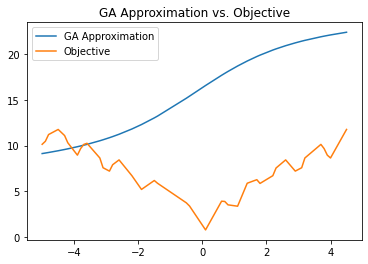

In [15]:
# Plots a solution.
def plot(individual, n):  
  w1 = individual[0:n]
  w1 = w1.reshape(n, 1)
  b1 = individual[n:2 * n]
  b1 = b1.reshape(n, 1)
  w2 = individual[2* n:3*n]
  b2 = individual[3 * n]

  #p = numpy.arange(-3, 3.01, 0.1)
  p = data["x"]
  t = data["f(x)"]

  y = numpy.zeros(len(p))
  for i in range(len(y)):
    a1 = logsig(numpy.add(numpy.matmul(w1, p[i].reshape(1, 1)), b1))  
    a2 = numpy.add(numpy.matmul(w2, a1), b2) * 10   
    y[i] = a2
  matplotlib.pyplot.plot(p, y, label = "GA Approximation")
  matplotlib.pyplot.plot(p, t, label = "Objective")  
  matplotlib.pyplot.legend()
  matplotlib.pyplot.title("GA Approximation vs. Objective")
  matplotlib.pyplot.show()


In [16]:
# Implements the tournament selection.
def select(population, evaluation, tournamentSize):
  winner = numpy.random.randint(0, len(population))
  for i in range(tournamentSize - 1):
    rival = numpy.random.randint(0, len(population))
    if (evaluation[rival] < evaluation[winner]):
      winner = rival
  return population[winner]

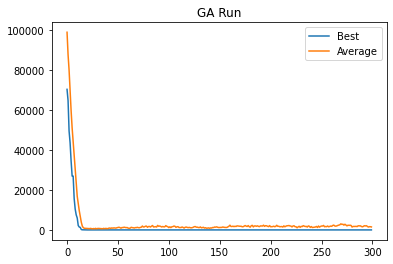

[-1.05996125e-01  6.29523659e-01 -4.31689126e-01  7.89698507e-01
  6.58707776e-01  9.88185795e-01 -4.33432177e-01  8.50108715e-01
 -3.71911177e-01  1.89336674e+00  1.39464655e-01 -8.36928997e-01
  1.30536807e+00  1.33184884e+00  2.25797942e-01  2.96939309e-01
 -7.92234439e-01 -1.15334322e+00  5.25523255e-01  5.20136714e-01
  4.88145210e-01  2.16153828e-01  7.60876781e-01  9.56606505e-01
  8.85592057e-01  1.61132035e+00  1.65662649e+00  6.11712960e-02
  8.06356291e-01  1.40029899e-01  4.82079119e-02  3.02816801e-02
  9.21726669e-01  1.76544463e+00  9.93997868e-01  1.66592929e+00
  1.06658036e+00  9.62164498e-01  9.43271149e-01  5.20779819e-02
  2.27869503e-01  2.86345562e-01 -1.41004509e+00  4.53261773e-01
  1.79683109e-01  2.00136203e+00  1.31553260e+00 -8.75089299e-01
  7.27100054e-01  2.91915272e-01  2.71322037e-01  1.55714444e-01
  4.51290491e-01  7.82707270e-01 -2.51787856e-01  1.50378156e+00
  8.73368506e-01  1.32381014e+00 -8.25044603e-01  4.89544430e-01
 -2.91347856e-02  1.53314

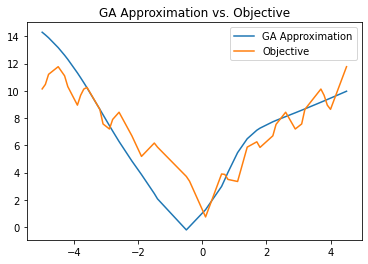

In [24]:
# Implements a genetic algorithm.
def geneticAlgorithm(n, populationSize, generations, cRate, mRate):
  # Creates the initial population (it also evaluates it)
  population = [None] * populationSize
  evaluation = [None] * populationSize  
  for i in range(populationSize):
    individual = createIndividual(n)
    population[i] = individual
    evaluation[i] = evaluate(individual, n)
  # Keeps a record of the best individual found so far
  index = 0;
  for i in range(1, populationSize):
    if (evaluation[i] < evaluation[index]):
      index = i;
  bestIndividual = population[index]
  bestEvaluation = evaluation[index]
  best = [0] * generations
  avg = [0] * generations
  # Runs the evolutionary process    
  for i in range(generations):
    k = 0
    newPopulation = [None] * populationSize    
    for j in range(populationSize // 2):
      parentA = select(population, evaluation, 3)
      parentB = select(population, evaluation, 3)
      newPopulation[k], newPopulation[k + 1] = combine(parentA, parentB, cRate)       
      k = k + 2    
    population = newPopulation
    for j in range(populationSize):
      population[j] = mutate(population[j], mRate)
      evaluation[j] = evaluate(population[j], n)
      # Keeps a record of the best individual found so far      
      if (evaluation[j] < bestEvaluation):        
        bestEvaluation = evaluation[j]
        bestIndividual = population[j]
    best[i] = bestEvaluation
    avg[i] = numpy.average(evaluation)  
  matplotlib.pyplot.plot(range(generations), best, label = "Best")
  matplotlib.pyplot.plot(range(generations), avg, label = "Average")
  matplotlib.pyplot.legend()
  matplotlib.pyplot.title("GA Run")
  matplotlib.pyplot.show()
  return bestIndividual, bestEvaluation

# Runs the genetic algorithm
n = 110
numpy.random.seed(seed=42)
#solution, evaluation = geneticAlgorithm(n, 100, 200, 0.9, 0.05)
solution, evaluation = geneticAlgorithm(n, 100, 300, 0.9, 0.10)
print(solution)
print(evaluation)
plot(solution, n)